# Proyecto Final-Inteligencia Artificial  
### Analisis de transacciones bancarias y su legalidad

Marco Ramírez 19588  

Pablo Coutiño

## Objetivo
El objetivo de este proyecto es evaluar los distintos algoritmos de machine learning, que nos permite predicir si una transaccion es fraude o no y mediante los resultados obtenidos indicar cual de los algoritmos es mas preciso y rapido. El dataset utilizado fue extraido de Kaggle. 

# Introduccion
En la base de datos, de los 6,362,620 registros, el 99.8% de los datos son no fraudulentos (en este contexto no es tan sorprendente que exista esta disparidad porque no es una actividad que en la que la mayoría de la población incurra por las implicaciones éticas y legales )
Para la creación de los modelos se requiere preprocesamiento de los datos para que los sets de entrenamiento y test tuvieran representación. 

### Random Forest

In [127]:
# Librerias para random forest
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus
import os
import time


Mandamos a llamar la base de datos de

In [128]:

# Para medir el tiempo
start_time = time.time()
# Leemos la base de datos
df = pd.read_csv('Fraud.csv')


Balanceamos los datos, con el objetivo de que exista la misma cantidad de datos no fraudes y fraudes

In [129]:
df_2 = df[df['isFraud'] == 0]
df_3 = df_2.head(8213)
df_1 = df[df['isFraud'] == 1]
df = pd.concat([df_1, df_3])

Asignamos las variables dependientes e independientes del modelo.

In [130]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

Dividimos los datos de entrenamiento y prueba, donde el 70% de los datos seran de entrenamiento y el 30% sera de prueba

In [131]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)  # 70% training and 30% test

Importamos la funcion de random forest y lo entrenamos, cabe mencionar que debido a la cantidad de datos almacenados en la base de datos, fue necesario podar el arbol, estableciendo un limite de 5 ramas, para evitar generar un arbol sumamente grande. 

In [132]:
# Import Random Forest Model
clf = RandomForestClassifier(
    n_estimators=100, random_state=0, criterion="entropy", max_depth=5)
# Train the model using the training sets y_pred=clf.predict(X_test)
clf = clf.fit(X_train, y_train)

Obtenemos la prediccion

In [133]:
y_pred = clf.predict(X_test)

Calculamos la precision del modelo

In [134]:
acc_random_forest= metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc_random_forest)

Accuracy: 0.9701704545454546


Arbol generado mediante random forest

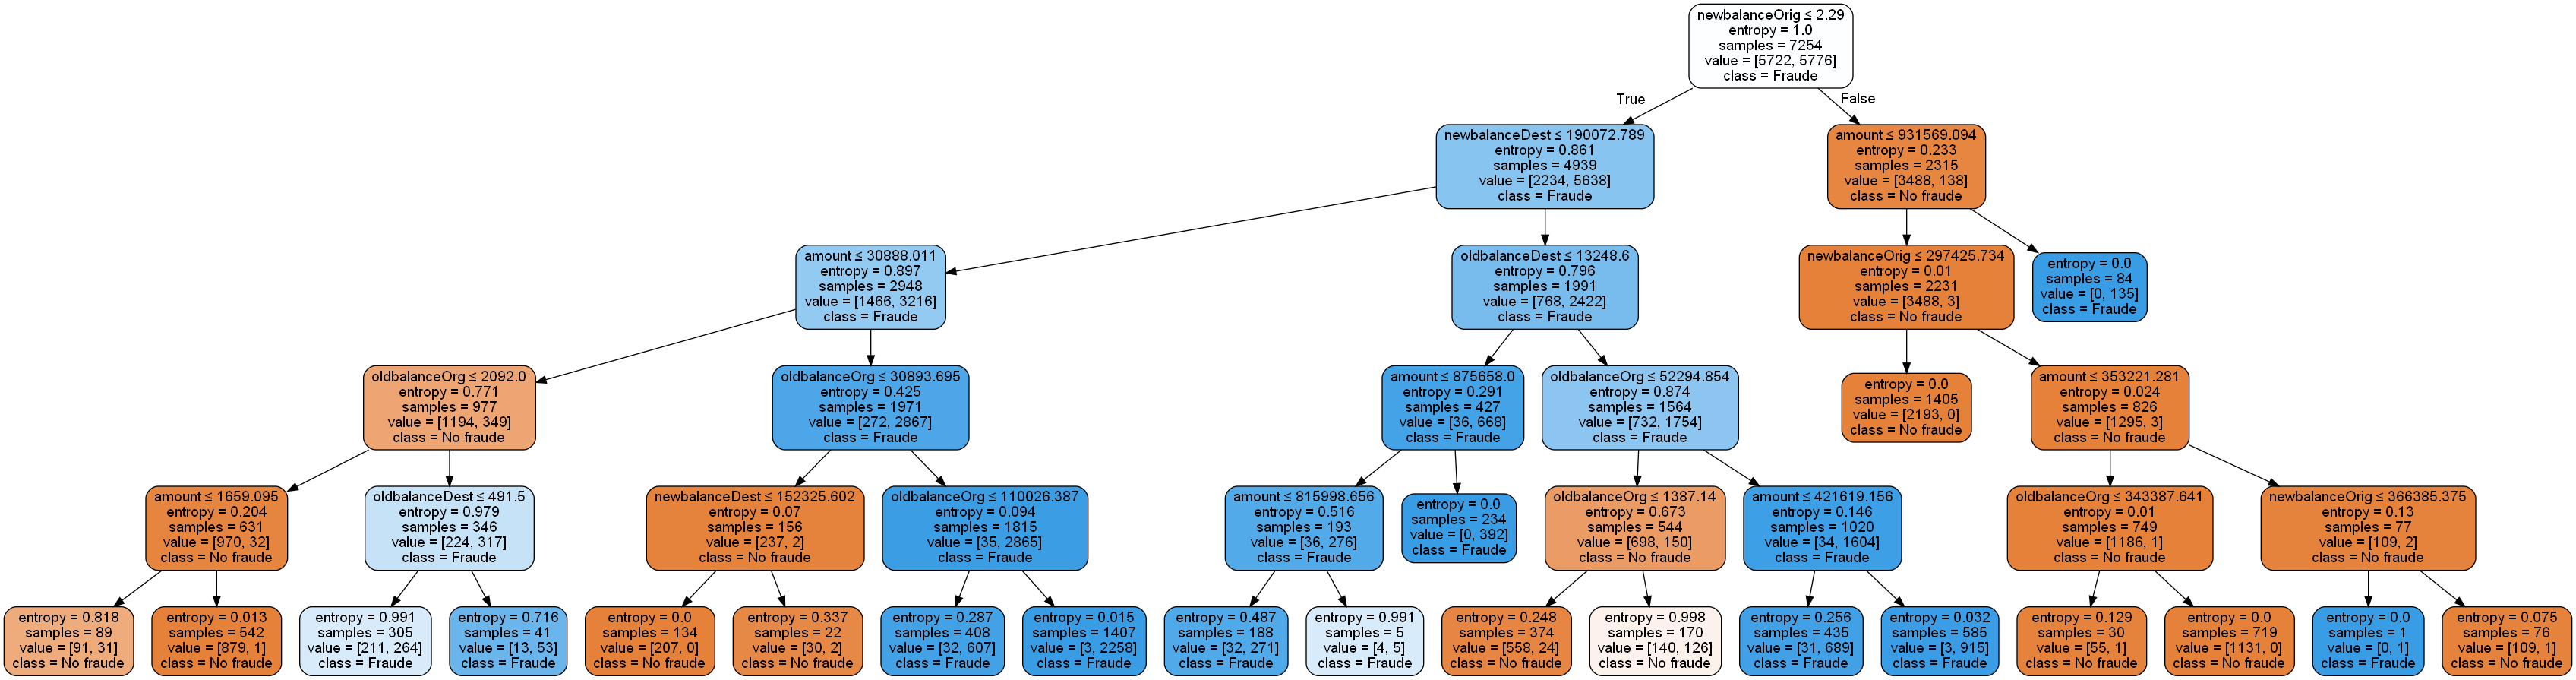

In [135]:
dot_data = StringIO()
export_graphviz(clf.estimators_[0], out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=['amount', 'oldbalanceOrg', 'newbalanceOrig',
                                                        'oldbalanceDest', 'newbalanceDest'], class_names=['No fraude', 'Fraude'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('RandomForest.png')
Image(graph.create_png())

In [136]:
time_random_forest=(time.time() - start_time)
print("--- %s seconds ---" % time_random_forest)
print("Accuracy:",acc_random_forest)

--- 11.14867901802063 seconds ---
Accuracy: 0.9701704545454546


Como se observa este modelo obtuvo una buena precision y un buen tiempo. 

### Decision Tree

In [137]:
#Librerias a utilizar
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

In [138]:
#Tiempo de ejecucion
start_time = time.time()

Leemos y balanceamos los datos


In [139]:
#Leemos la base datos
df = pd.read_csv('Fraud.csv')
#Balanceamos los datos
df_2 = df[df['isFraud'] == 0]
df_3 = df_2.head(8213)
df_1 = df[df['isFraud'] == 1]
df = pd.concat([df_1, df_3])


Indicamos nuestras variables dependientes e indenpendientes

In [140]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

Dividimos la base de datos en entrenamiento y prueba, donde el 70% de los datos son de entrenamiento y el 30% son de prueba

In [141]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

Creamos el arbol de decision, nuevamente podado para evitar generar un arbol demasiado grande y despues lo entrenamos

In [142]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

Obtenemos la precision del modelo

In [143]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
acc_tree=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acc_tree)


Accuracy: 0.9758522727272727


Generamos el arbol

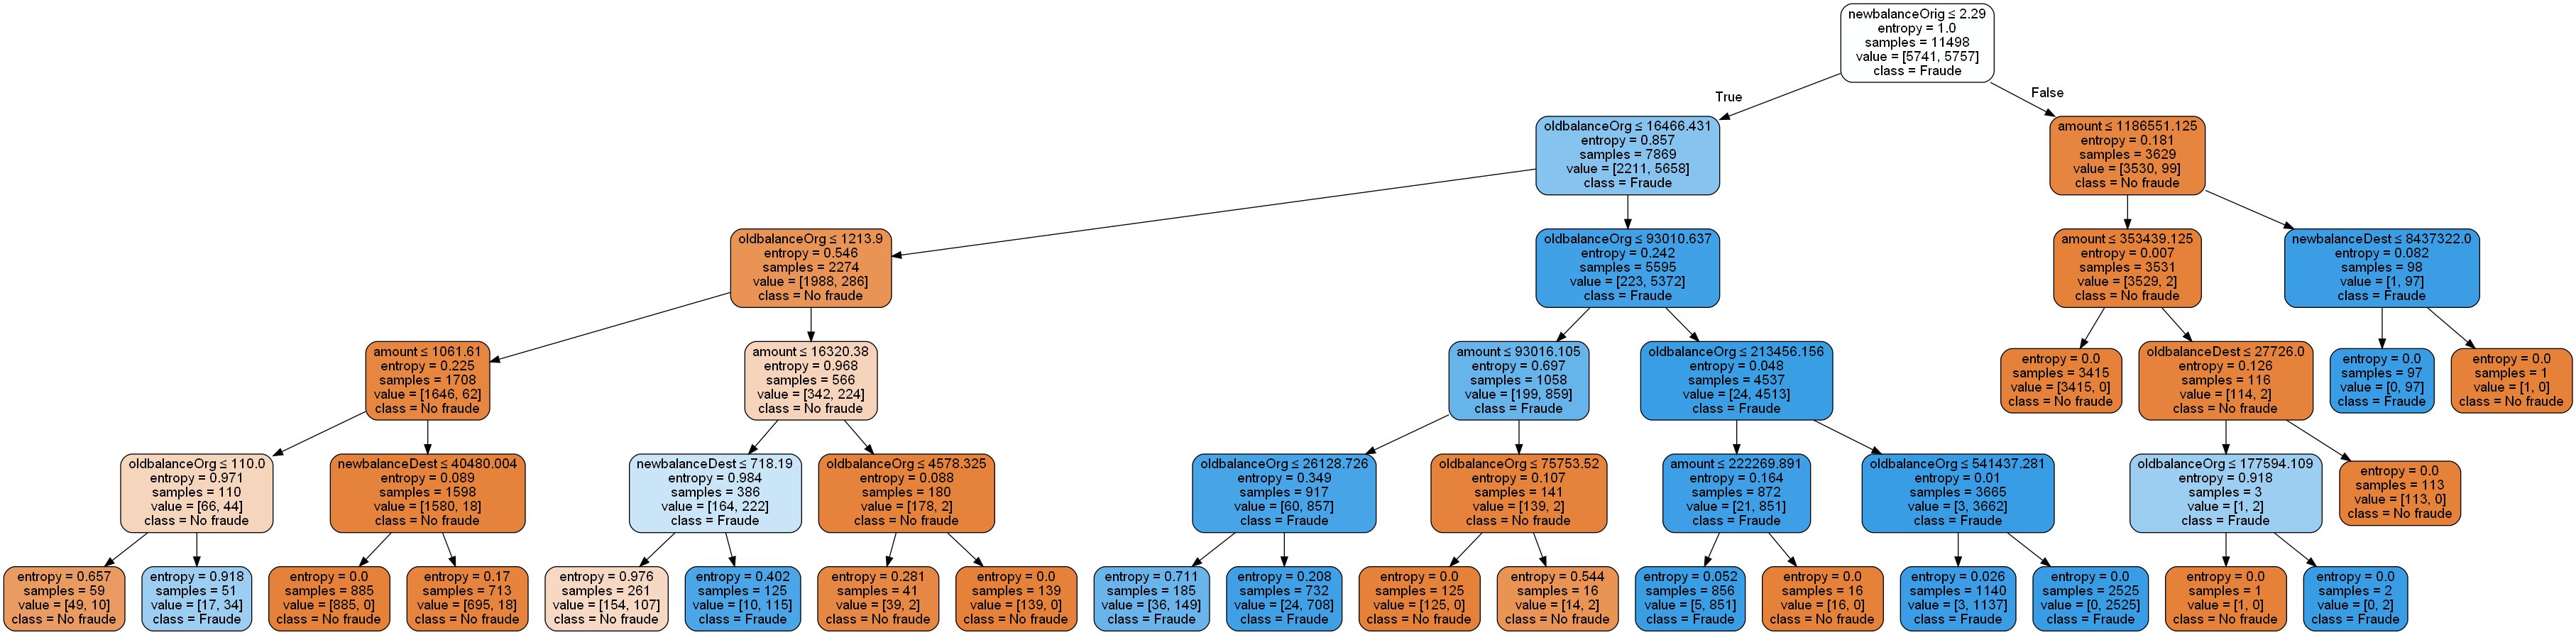

In [144]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=['amount', 'oldbalanceOrg', 'newbalanceOrig',
                                                        'oldbalanceDest', 'newbalanceDest'], class_names=['No fraude', 'Fraude'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [145]:
time_tree=(time.time() - start_time)
print("--- %s seconds ---" % time_tree)
print("Accuracy:",acc_tree)

--- 10.81647777557373 seconds ---
Accuracy: 0.9758522727272727


Como se observa este modelo tambien obtuvo buenos resultados, donde mas adelante se compararan con los demas.